# How does changing common-envelope efficiency change mergers

In [1]:
import numpy as np
import astropy.units as u
import pandas as pd
import matplotlib.pyplot as plt

import cogsworth

In [2]:
# ensure jupyter actually uses your fancy retina display
%config InlineBackend.figure_format = 'retina'

# make pandas show *every* column
pd.set_option("display.max_columns", None)

# various adjustments to matplotlib settings
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

# Change binary physics settings
You can use `cogsworth` to see how changing binary physics settings changes your results.

## Example: Supernova natal kick strength

### Default simulation

In [52]:
p = cogsworth.pop.Population(n_binaries=1000,
                             final_kstar1=[13, 14], final_kstar2=[13, 14])
p.sample_initial_binaries()
p.perform_stellar_evolution()

By default this uses a 265km/s Maxwellian distribution. We can prove this by plotting things

In [53]:
p.kick_info

,star,disrupted,natal_kick,phi,theta,mean_anomaly,delta_vsysx_1,delta_vsysy_1,delta_vsysz_1,vsys_1_total,delta_vsysx_2,delta_vsysy_2,delta_vsysz_2,vsys_2_total,delta_theta_total,omega,randomseed,bin_num
0,1.0,0.0,0.000000,-31.989007,357.174540,71.514162,-1.353370,0.073519,1.194505,1.806615,0.0,0.0,0.0,0.0,0.000000,0.000000,-1.176669e+09,0.0
0,2.0,0.0,0.000000,31.174036,308.729961,76.583081,-1.929913,-0.705875,-0.885353,3.357885,-0.0,0.0,0.0,0.0,0.000000,0.000000,5.103238e+07,0.0
1,1.0,0.0,398.518041,39.173603,339.517815,264.103775,-13.375077,45.016989,4.190795,47.148539,0.0,0.0,0.0,0.0,99.945844,112.211433,-5.519229e+08,1.0
1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,1.0
2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,1011.0
1012,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,1012.0
1012,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,1012.0
1013,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,1013.0


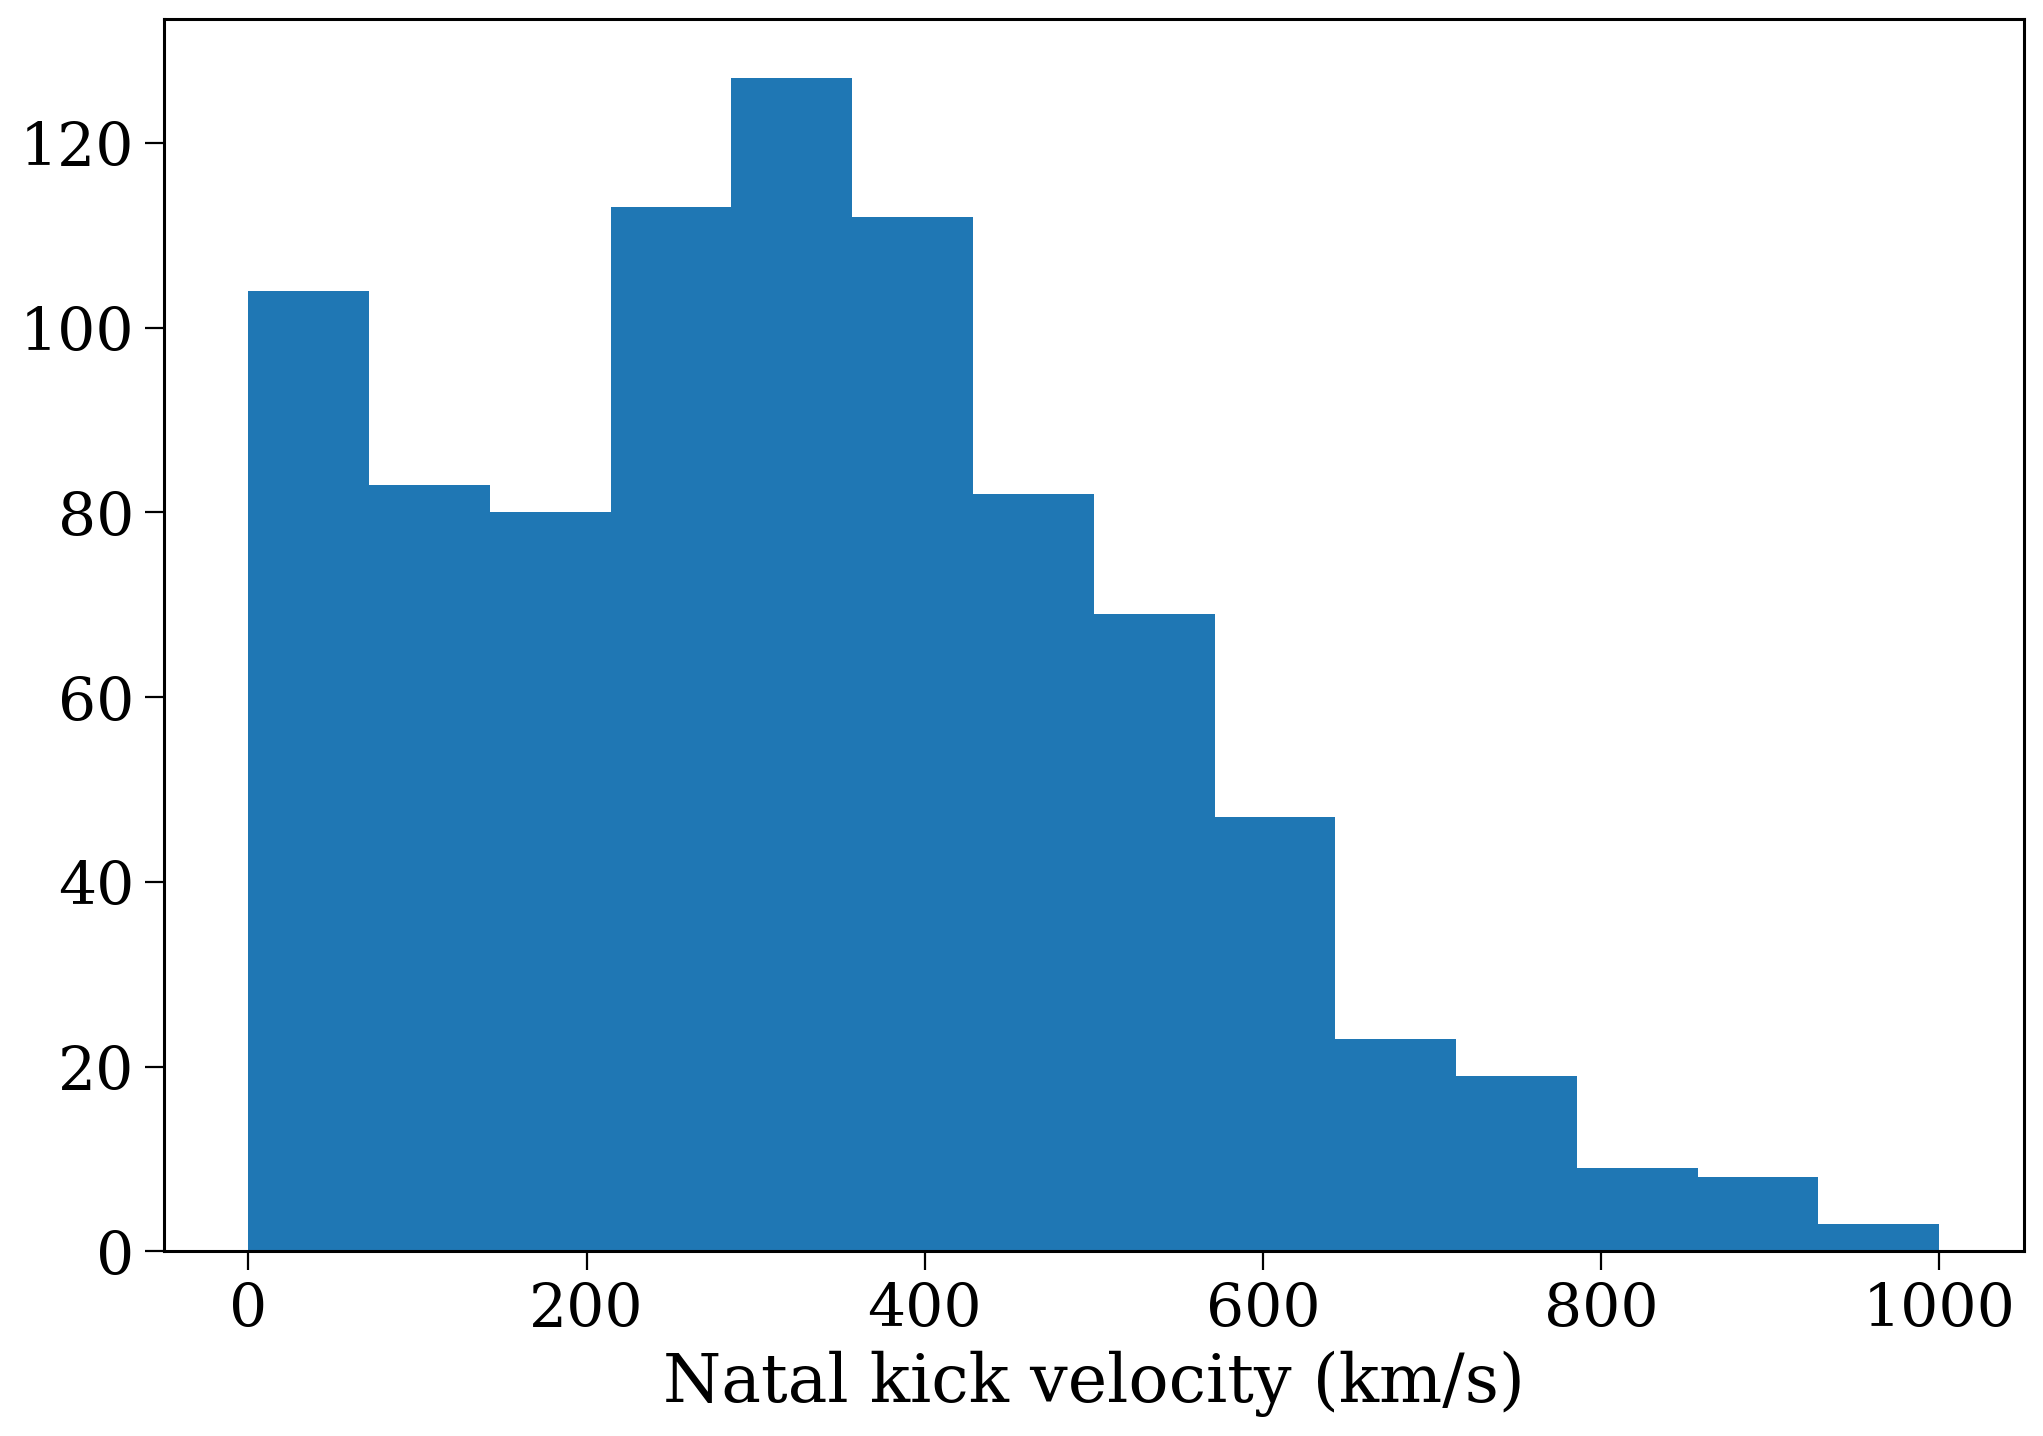

In [54]:
kick_strengths = p.kick_info["natal_kick"][p.kick_info["natal_kick"] > 0]
plt.hist(kick_strengths, bins=np.linspace(0, 1000, 15))
plt.xlabel("Natal kick velocity (km/s)")
plt.show()

In [31]:
# count the number of binaries that got kicks while they hadn't already merged
n_kicked = len(p.bpp[((p.bpp["evol_type"] == 15) | (p.bpp["evol_type"] == 16)) & (p.bpp["sep"] != 0.0)]["bin_num"].unique())
f'{p.disrupted.sum() / n_kicked:1.2f}'

'0.76'

### Variation with weaker kicks

Now let's run things again, but change the BSE settings to use a different kick distribution.

In [35]:
p.BSE_settings["sigma"] = 20
p.perform_stellar_evolution()

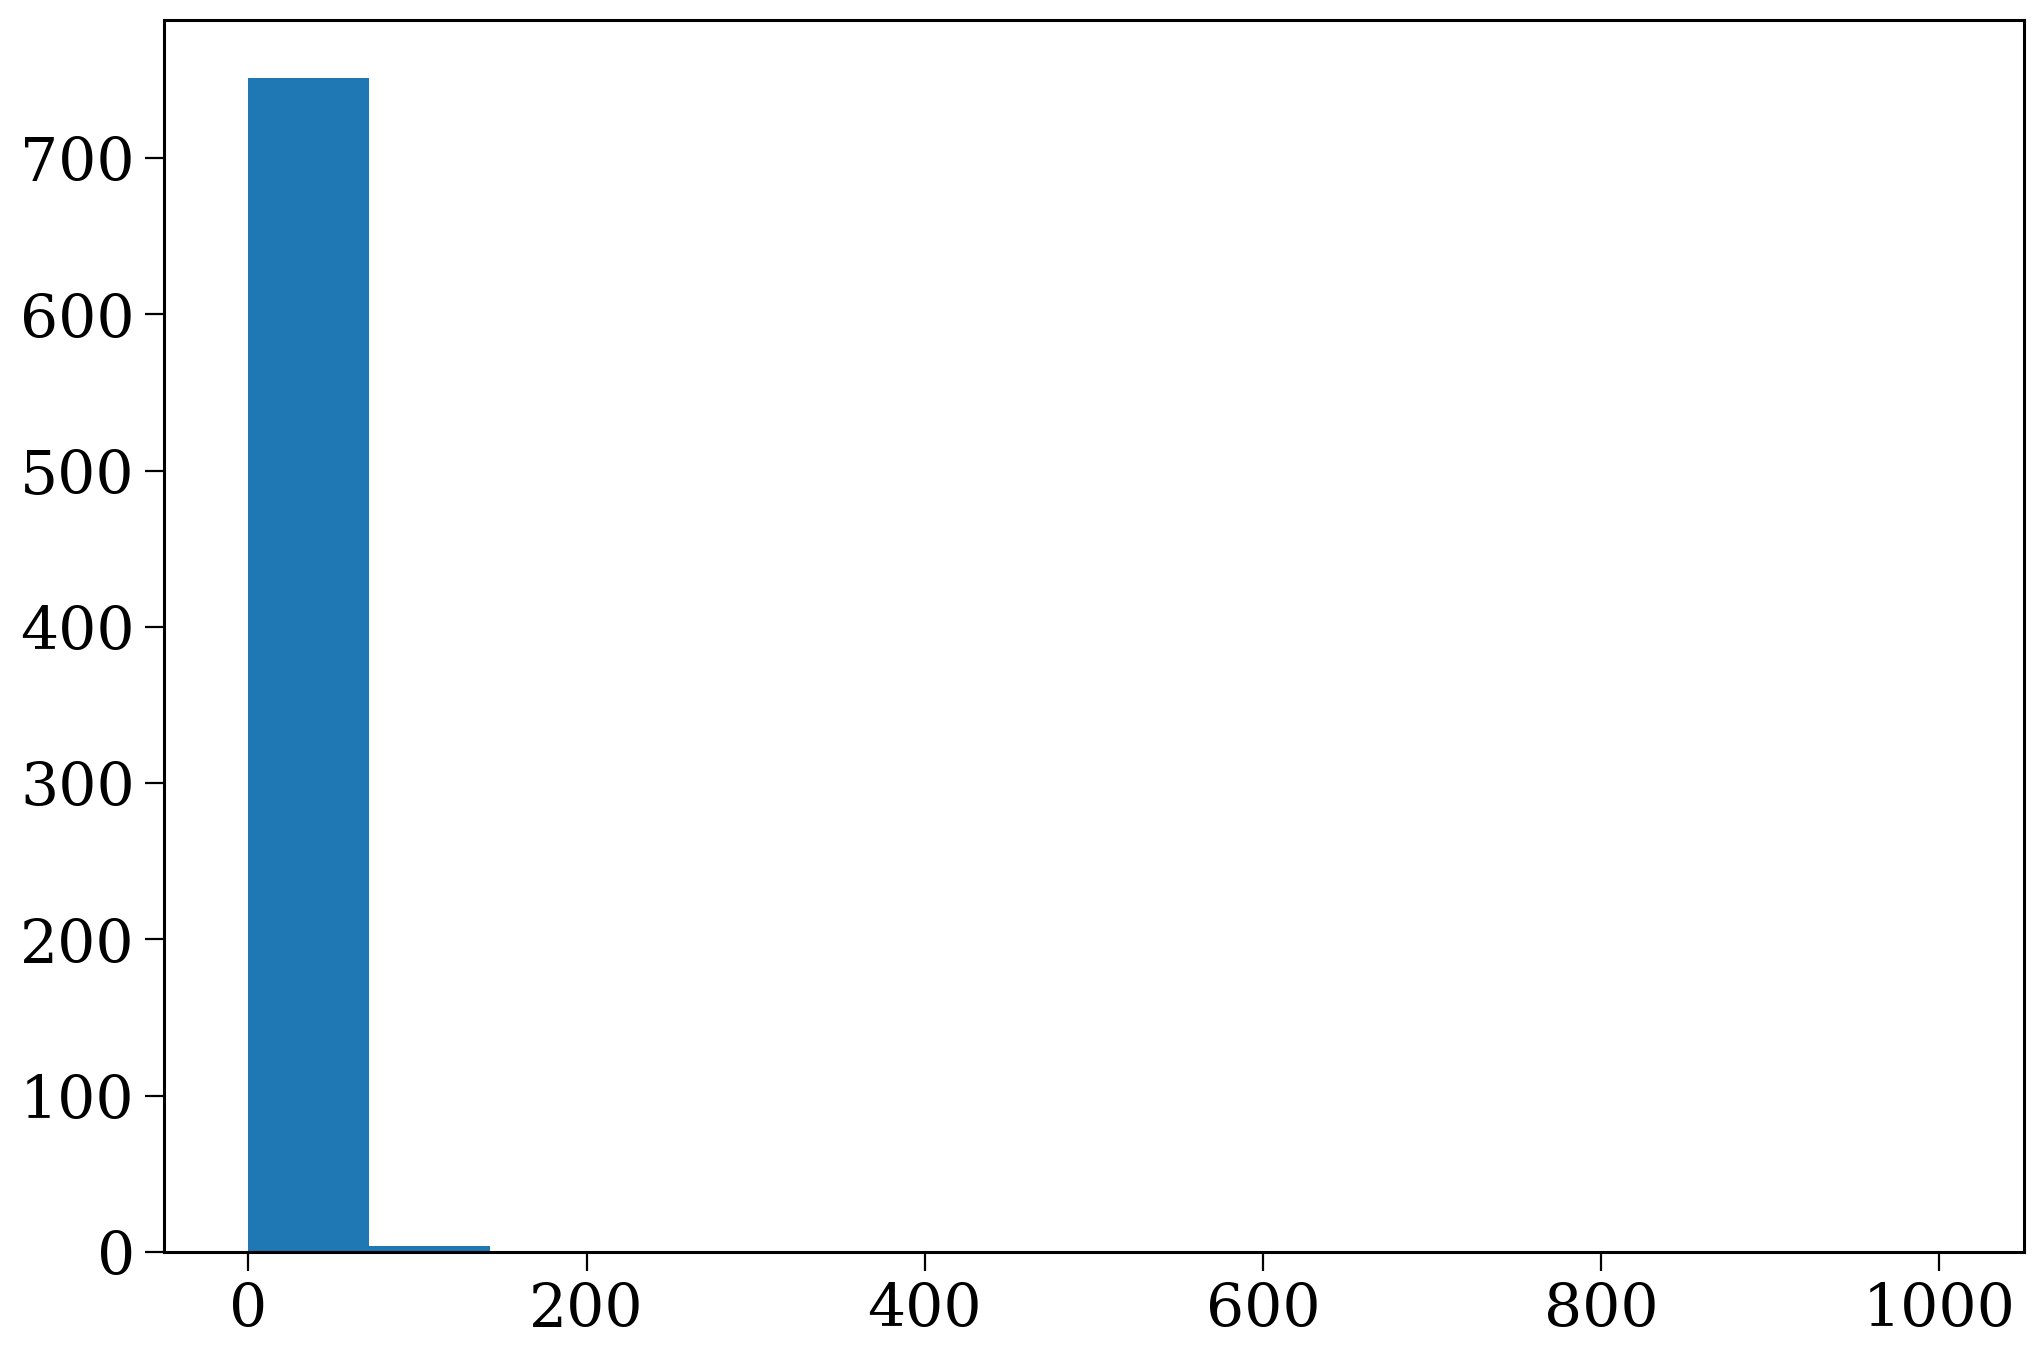

In [36]:
kick_strengths = p.kick_info["natal_kick"][p.kick_info["natal_kick"] > 0]
plt.hist(kick_strengths, bins=np.linspace(0, 1000, 15))
plt.show()

In [37]:
# count the number of binaries that got kicks while they hadn't already merged
n_kicked = len(p.bpp[((p.bpp["evol_type"] == 15) | (p.bpp["evol_type"] == 16)) & (p.bpp["sep"] != 0.0)]["bin_num"].unique())
f'{p.disrupted.sum() / n_kicked:1.2f}'

'0.31'

# Mask out mergers from CEs
We need to create a mask for systems that merged and experienced a CE

In [43]:
# mask for mergers
merger = (p.final_bpp['sep'] == 0.0)
merger.sum()

678

In [44]:
# mask for experienced CE
had_ce = np.isin(p.bin_nums, p.bpp[p.bpp['evol_type'] == 7]["bin_num"].unique())
had_ce.sum()

710

In [50]:
(had_ce & merger).sum() / had_ce.sum()

0.828169014084507

# Re-run with different CE efficiency
Let's change the efficiency of common-envelopes and see what happens

In [48]:
# create a population of 1000 binaries
p = cogsworth.pop.Population(n_binaries=1000)
p.sample_initial_binaries()

In [49]:
# loop over different alpha values, comparing the fraction of CEs that lead to merger
for alpha in [10, 2, 1, 0.5, 0.1]:
    # change the setting and perform evolution
    p.BSE_settings["alpha1"] = alpha
    p.perform_stellar_evolution()

    # find all binaries that start a CE and how many end as a mergers
    ce_nums = p.bpp[p.bpp["evol_type"] == 7]["bin_num"].unique()
    n_merged = (p.final_bpp.loc[ce_nums]["sep"] == 0.0).sum()

    # get separations after the first CE for each binary
    seps = p.bpp[p.bpp["evol_type"] == 8].drop_duplicates(subset="bin_num", keep="first")["sep"].values

    print(f"Run for alpha = {alpha}")
    print(f"  {len(ce_nums)} binaries experience at least one common-envelope event")
    print(f"  {n_merged / len(ce_nums) * 100:1.1f}% of these resulted in a stellar merger")
    print(f"  For surviving systems, mean separation immediately after the CE is {np.mean(seps):1.2f} Rsun\n")

Run for alpha = 10
  109 binaries experience at least one common-envelope event
  24.8% of these resulted in a stellar merger
  For surviving systems, mean separation immediately after the CE is 35.23 Rsun

Run for alpha = 2
  109 binaries experience at least one common-envelope event
  57.8% of these resulted in a stellar merger
  For surviving systems, mean separation immediately after the CE is 9.88 Rsun

Run for alpha = 1
  109 binaries experience at least one common-envelope event
  74.3% of these resulted in a stellar merger
  For surviving systems, mean separation immediately after the CE is 5.08 Rsun

Run for alpha = 0.5
  109 binaries experience at least one common-envelope event
  84.4% of these resulted in a stellar merger
  For surviving systems, mean separation immediately after the CE is 2.41 Rsun

Run for alpha = 0.1
  109 binaries experience at least one common-envelope event
  96.3% of these resulted in a stellar merger
  For surviving systems, mean separation immediat